# Tugas 3.1 : Implementasi Algoritma Logistic Regression

Pada Tugas 3.1 ini diminta untuk melakukan proses pembuatan model dari data VSM yang telah dibuat sebelumnya menggunakan algoritma Logistic Regression.

Dibuat Oleh:

*   Nama : Sabil Ahmad Hidayat
*   NIM : 220411100058
*   Kelas : PPW A

Link Code : https://colab.research.google.com/drive/1z3vSdGjASLTsxGVhzBoOSJBG2kiG8aT4?usp=sharing

Link Github : https://github.com/meinhere/ppw/tree/master/publish/tugas-3

## Import Library

In [ ]:
# library awal untuk perhitungan dan pengolahan teks
import numpy as np
import pandas as pd

# library untuk proses modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# save model
import pickle

**preprocessing** disini digunakan untuk melakukan proses encoding pada label

**train_test_split** digunakan untuk membagi dataset menjadi data training dan testing

**LogisticRegression** digunakan untuk tahap modeling menggunakan library LogisticRegression

**classification_report** dan **confusion_matrix** digunakan untuk melihat laporan dan hasil evaluasi setelah proses training data

**matplotlib** dan **seaborn** digunakan untuk plotting grafik

**pickle** digunakan untuk menyimpan model hasil training dan testing

## Proses Modeling

### Load Data

In [ ]:
main_df = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-3/data_berita_vsm.csv', delimiter=',')
main_df

,Kategori Berita,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acapkali,...,za,zad,zag,zaman,zarco,zenix,zero,zig,zigzag,zona
0,OTOMOTIF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OTOMOTIF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MONEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MONEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MONEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OTOMOTIF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,MONEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,MONEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,MONEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preparing Data

#### Encode Label
Dilakukan tahap encoding pada kolom **[Kategori Berita]** dimana data yang yang terdapat didalamnya masih berupa data kategorik (kata) sehingga perlu dirubah menjadi angka agar bisa dimasukkan ke dalam proses training model. Berikut adalah hasil dari proses encode.


*   OTOMOTIF = 1
*   MONEY = 0



In [ ]:
# menggunakan label_encoder untuk merubah kata menjadi angka
label_encoder = preprocessing.LabelEncoder()
main_df['Kategori Berita']= label_encoder.fit_transform(main_df['Kategori Berita'])

main_df

,Kategori Berita,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acapkali,...,za,zad,zag,zaman,zarco,zenix,zero,zig,zigzag,zona
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting Data

Setelah data berbentuk numerik, maka dilakukan proses splitting/pemecahan data menjadi **Data Training** dana **Data Testing** untuk masuk ke tahap proses modeling.

In [ ]:
# split data untuk data feature dan data target
X = main_df.drop(['Kategori Berita'], axis=1)
y = main_df['Kategori Berita']

# split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Logistic Regression Model

#### Training

In [ ]:
# fit model untuk training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

#### Testing

In [ ]:
# mencoba prediksi dari hasi fitting model
y_pred = lr_model.predict(X_test)

y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
# melihat nilai actual dan predicted
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
83,0,0
30,1,1
56,0,0
24,1,1
16,1,1


Dilakukan proses testing data. Pada tabel diatas dapat dilihat bahwa hasil yang terprediksi (predicted) apakah sesuai dengan data asli (actual).

### Evaluation Model

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



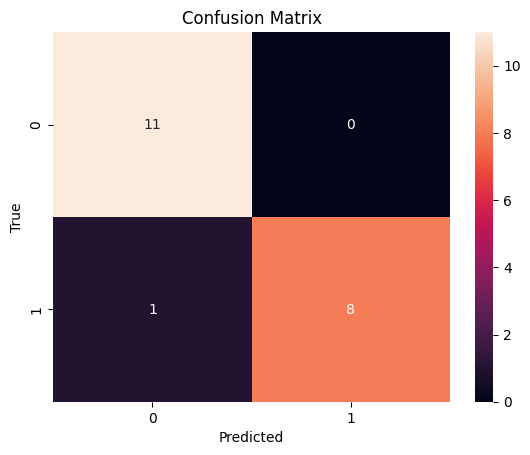

In [ ]:
# Confusion matrix dan classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

Dilakukan proses evaluasi model menggunakan **confusion_matrix**. Dengan begitu, dapat dilihat bahwa dari 20 data uji terdapat 1 data uji yang salah prediksi sehingga akurasi yang didapat dari model tersebut adalah **0.95 / 95%**

## Saving Model

In [ ]:
# Save the pipeline to a file
filename = 'lr_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))